## **RideWise Baseline and Advanced Classification Models**
In the RideWise churn prediction project, model development begins with a baseline classifier to establish a benchmark. Logistic Regression is typically used here because it is simple, interpretable, and provides a clear starting point for evaluating performance. The baseline helps identify whether more complex models are truly adding value beyond straightforward statistical relationships.

Building on this foundation, RideWise explores advanced classification models to capture deeper patterns in rider behaviour. These include Decision Trees, Random Forests, Support Vector Machines (SVM), K‑Nearest Neighbours (KNN), Naive Bayes, Gradient Boosting (XGBoost), and AdaBoost.

Each of these algorithms offers different strengths:

- Tree‑based methods (Decision Trees, Random Forests, Gradient Boosting, AdaBoost) excel at handling non‑linear relationships and feature interactions.

- SVM and KNN are effective for boundary‑based classification, especially in complex feature spaces.

- Naive Bayes provides a fast, probabilistic approach that can be useful for imbalanced datasets.

By comparing these models against the baseline, RideWise can identify which techniques deliver the best balance of accuracy, recall, and precision—particularly important given the class imbalance between “Churning” and “Not Churning” riders. Hyperparameter tuning further refines these models, ensuring they are optimised for the dataset’s characteristics.

#####

**Connecting Google Drive**

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

**Preparing the neccessary libraries for use**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Ignore all warnings
warnings.filterwarnings("ignore")

**Pulling data into the system**

In [5]:
master_df  = pd.read_csv('../data/processed_data/trip_riders_drivers_eda_df.csv')
rfm_df = pd.read_csv('../data/processed_data/rfms_table.csv')

print('dataframes ingested successfully as expected')
print(f'The master_df shape is:')
print(master_df.shape)
print(f'The rfm_df shape is:')
print(rfm_df.shape)

dataframes ingested successfully as expected
The master_df shape is:
(200000, 38)
The rfm_df shape is:
(10000, 14)


### **Master Data**

In [6]:
master_df.head(2)

,trip_id,user_id,driver_id,fare,surge_multiplier,tip,payment_type,pickup_time,dropoff_time,pickup_lat,...,rider_age_group,pickup_hour,pickup_date,pickup_day,pickup_month,pickup_year,pickup_period,pickup_season,potential_fare,rating_gap
0,T090716,R00102,D00000,5.07,1.0,0.00,Mobile Money,2025-03-14 08:29:08+00:00,2025-03-14 09:08:08+00:00,30.013226,...,Mid-Career Adults,8,2025-03-14,Friday,March,2025,Morning,Spring,7.460766,1.3
1,T113266,R01412,D00000,19.69,1.0,0.44,Mobile Money,2025-03-04 08:23:47+00:00,2025-03-04 09:10:47+00:00,30.131991,...,Young Starters,8,2025-03-04,Tuesday,March,2025,Morning,Spring,28.974851,1.5


In [7]:
master_df.info()  # master dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_id             200000 non-null  object 
 1   user_id             200000 non-null  object 
 2   driver_id           200000 non-null  object 
 3   fare                200000 non-null  float64
 4   surge_multiplier    200000 non-null  float64
 5   tip                 200000 non-null  float64
 6   payment_type        200000 non-null  object 
 7   pickup_time         200000 non-null  object 
 8   dropoff_time        200000 non-null  object 
 9   pickup_lat          200000 non-null  float64
 10  pickup_lng          200000 non-null  float64
 11  dropoff_lat         200000 non-null  float64
 12  dropoff_lng         200000 non-null  float64
 13  weather             200000 non-null  object 
 14  loyalty_status      200000 non-null  object 
 15  user_signup_date    200000 non-nul

The master_df contains no missing values; however, certain columns still need to be assigned their appropriate data types.

---

### **RFM Data**

In [8]:
rfm_df.head(2)  # RFM dataframe

,user_id,recency,frequency,monetary,surge_exposure(%),r,f,m,s,rfm_concat,rfm_score,riders_segmentation,weighted_score,weighted_segmentation
0,R00000,27,25,366.05,0.280000,2,4,4,2,244,12,Regular Commuters,3.0,Average Risk Rider
1,R00001,7,14,180.53,0.214286,4,1,1,1,411,7,Occasional Riders,2.2,Average Risk Rider


**Removing the irrelevant columns in the RFM data**

In [9]:
rfm_df.drop(columns=['r', 'f','m','s','rfm_concat','rfm_score','weighted_segmentation'], inplace=True)
rfm_df.head()

,user_id,recency,frequency,monetary,surge_exposure(%),riders_segmentation,weighted_score
0,R00000,27,25,366.05,0.280000,Regular Commuters,3.0
1,R00001,7,14,180.53,0.214286,Occasional Riders,2.2
2,R00002,16,24,378.99,0.375000,Regular Commuters,3.1
3,R00003,63,9,121.47,0.333333,At Risk Users,1.1
4,R00004,14,16,268.43,0.437500,Occasional Riders,2.3


**Merging the two DataFrames**

In [10]:
master_rfm_df = pd.merge(master_df,rfm_df,on='user_id')

In [11]:
master_rfm_df.head(2)

,trip_id,user_id,driver_id,fare,surge_multiplier,tip,payment_type,pickup_time,dropoff_time,pickup_lat,...,pickup_period,pickup_season,potential_fare,rating_gap,recency,frequency,monetary,surge_exposure(%),riders_segmentation,weighted_score
0,T090716,R00102,D00000,5.07,1.0,0.00,Mobile Money,2025-03-14 08:29:08+00:00,2025-03-14 09:08:08+00:00,30.013226,...,Morning,Spring,7.460766,1.3,19,12,171.6,0.25000,At Risk Users,1.4
1,T113266,R01412,D00000,19.69,1.0,0.44,Mobile Money,2025-03-04 08:23:47+00:00,2025-03-04 09:10:47+00:00,30.131991,...,Morning,Spring,28.974851,1.5,4,21,362.8,0.47619,High‑Value Loyalists,3.7


#

#### **Engineering a `Rider Active Days` feature**
- **Rider Active days:** This counts the total number of days each rider has been registered on the platform

In [12]:
master_rfm_df['last_active'] = pd.to_datetime(master_rfm_df['last_active'], utc=True, errors='coerce')
master_rfm_df['user_signup_date'] = pd.to_datetime(master_rfm_df['user_signup_date'], utc=True, errors='coerce')
master_rfm_df['rider_active_days'] = (master_rfm_df['last_active'] -  master_rfm_df['user_signup_date']).dt.days
master_rfm_df.head()

,trip_id,user_id,driver_id,fare,surge_multiplier,tip,payment_type,pickup_time,dropoff_time,pickup_lat,...,pickup_season,potential_fare,rating_gap,recency,frequency,monetary,surge_exposure(%),riders_segmentation,weighted_score,rider_active_days
0,T090716,R00102,D00000,5.07,1.0,0.00,Mobile Money,2025-03-14 08:29:08+00:00,2025-03-14 09:08:08+00:00,30.013226,...,Spring,7.460766,1.3,19,12,171.60,0.250000,At Risk Users,1.4,432
1,T113266,R01412,D00000,19.69,1.0,0.44,Mobile Money,2025-03-04 08:23:47+00:00,2025-03-04 09:10:47+00:00,30.131991,...,Spring,28.974851,1.5,4,21,362.80,0.476190,High‑Value Loyalists,3.7,249
2,T163944,R01518,D00000,21.49,1.1,1.59,Card,2025-03-09 15:33:44+00:00,2025-03-09 16:21:44+00:00,30.033368,...,Spring,31.623643,0.9,25,16,268.26,0.500000,Occasional Riders,1.9,236
3,T059639,R01955,D00000,22.02,1.3,0.00,Mobile Money,2024-07-20 16:57:17+00:00,2024-07-20 17:14:17+00:00,30.027920,...,Summer,32.403566,1.1,16,17,294.17,0.352941,Occasional Riders,1.8,496
4,T080633,R01996,D00000,11.25,1.0,0.04,Card,2024-05-29 12:09:12+00:00,2024-05-29 12:21:12+00:00,29.961317,...,Spring,16.554955,1.6,6,29,433.47,0.172414,Regular Commuters,3.7,585


#####

**The new master DataFrame, created by combining the two DataFrames, is now named `master_rfm_df`.**

In [13]:
master_rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 45 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   trip_id              200000 non-null  object             
 1   user_id              200000 non-null  object             
 2   driver_id            200000 non-null  object             
 3   fare                 200000 non-null  float64            
 4   surge_multiplier     200000 non-null  float64            
 5   tip                  200000 non-null  float64            
 6   payment_type         200000 non-null  object             
 7   pickup_time          200000 non-null  object             
 8   dropoff_time         200000 non-null  object             
 9   pickup_lat           200000 non-null  float64            
 10  pickup_lng           200000 non-null  float64            
 11  dropoff_lat          200000 non-null  float64            
 12  dr

The `master_rfm_df` contains no missing values.

---

###

## **Model Training**

**Extracting the relevant columns for model training**

In [14]:
collumns_needed = ['user_id','surge_exposure(%)','loyalty_status','rating_by_rider','churn_prob','recency','frequency','monetary','rider_active_days']
for col in master_rfm_df.columns:
  if col not in collumns_needed:
    master_rfm_df = master_rfm_df.drop(columns=[col])

master_rfm_df.head()

,user_id,loyalty_status,churn_prob,rating_by_rider,recency,frequency,monetary,surge_exposure(%),rider_active_days
0,R00102,Silver,0.411712,3.1,19,12,171.60,0.250000,432
1,R01412,Bronze,0.196812,3.1,4,21,362.80,0.476190,249
2,R01518,Bronze,0.329130,3.1,25,16,268.26,0.500000,236
3,R01955,Bronze,0.120379,3.1,16,17,294.17,0.352941,496
4,R01996,Bronze,0.264715,3.1,6,29,433.47,0.172414,585


In [15]:
master_rfm_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,200000,10000,R08152,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loyalty_status,200000,4,Bronze,121252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
churn_prob,200000.0,NaN,NaN,NaN,0.285692,0.159011,0.002934,0.161546,0.265622,0.388132,0.913302
rating_by_rider,200000.0,NaN,NaN,NaN,4.173625,0.594107,3.1,3.7,4.2,4.7,5.0
recency,200000.0,NaN,NaN,NaN,19.286195,17.368341,2.0,7.0,14.0,26.0,176.0
frequency,200000.0,NaN,NaN,NaN,21.01167,4.501407,6.0,18.0,21.0,24.0,42.0
monetary,200000.0,NaN,NaN,NaN,323.662375,75.125388,78.87,270.84,319.45,372.05,663.91
surge_exposure(%),200000.0,NaN,NaN,NaN,0.335735,0.105692,0.0,0.263158,0.333333,0.407407,0.818182
rider_active_days,200000.0,NaN,NaN,NaN,397.143225,168.294834,-811.0,322.0,354.0,509.0,731.0


In [16]:
master_rfm_df[master_rfm_df['churn_prob'] >= 0.4]

,user_id,loyalty_status,churn_prob,rating_by_rider,recency,frequency,monetary,surge_exposure(%),rider_active_days
0,R00102,Silver,0.411712,3.1,19,12,171.60,0.250000,432
10,R03136,Bronze,0.684276,3.1,13,24,344.45,0.166667,435
12,R03445,Silver,0.425487,3.1,2,21,321.85,0.333333,211
18,R05047,Bronze,0.656063,3.1,11,25,399.71,0.440000,355
19,R05474,Bronze,0.403536,3.1,9,25,353.67,0.240000,527
...,...,...,...,...,...,...,...,...,...
199985,R07015,Gold,0.569687,4.1,15,17,230.54,0.352941,653
199987,R07739,Platinum,0.428762,4.1,5,24,363.78,0.208333,477
199992,R08977,Gold,0.497340,4.1,4,23,311.92,0.304348,400
199994,R09293,Bronze,0.444470,4.1,12,37,558.51,0.459459,284


#####

**Engineering the `monthly_trips` feature to show the average number of trips a rider make per month.**



In [17]:
master_rfm_df['monthly_trips'] = (master_rfm_df['frequency'] / master_rfm_df['rider_active_days']) * 30
master_rfm_df.head()

,user_id,loyalty_status,churn_prob,rating_by_rider,recency,frequency,monetary,surge_exposure(%),rider_active_days,monthly_trips
0,R00102,Silver,0.411712,3.1,19,12,171.60,0.250000,432,0.833333
1,R01412,Bronze,0.196812,3.1,4,21,362.80,0.476190,249,2.530120
2,R01518,Bronze,0.329130,3.1,25,16,268.26,0.500000,236,2.033898
3,R01955,Bronze,0.120379,3.1,16,17,294.17,0.352941,496,1.028226
4,R01996,Bronze,0.264715,3.1,6,29,433.47,0.172414,585,1.487179


In [18]:
master_rfm_df['monthly_trips'].max()

inf

**Readjusting the column order**

In [19]:
master_rfm_df = master_rfm_df[['user_id',
                               'recency',
                               'frequency',
                               'monetary',
                               'surge_exposure(%)',
                               'loyalty_status',
                               'churn_prob',
                               'rider_active_days',
                               'rating_by_rider',
                               'monthly_trips']]
master_rfm_df.head()

,user_id,recency,frequency,monetary,surge_exposure(%),loyalty_status,churn_prob,rider_active_days,rating_by_rider,monthly_trips
0,R00102,19,12,171.60,0.250000,Silver,0.411712,432,3.1,0.833333
1,R01412,4,21,362.80,0.476190,Bronze,0.196812,249,3.1,2.530120
2,R01518,25,16,268.26,0.500000,Bronze,0.329130,236,3.1,2.033898
3,R01955,16,17,294.17,0.352941,Bronze,0.120379,496,3.1,1.028226
4,R01996,6,29,433.47,0.172414,Bronze,0.264715,585,3.1,1.487179


### **Defining the `Target Variable` using conditional logic**
- Writing a function to classify a rider’s churn status based on predefined conditions, returning True if any condition is satisfied, and False otherwise.

In [20]:
def is_churning(row):

    # Condition 1:- Recency > 30 AND Churn probability > 0.5
    if row['recency'] > 30 and row['churn_prob'] > 0.5:
        return True

    # Condition 2:- Monthly trips < 1 AND Rating by rider < 4.7`
    if row['monthly_trips'] < 1 and row['rating_by_rider'] < 4.2:
        return True

    # Condition 3: Loyalty status is Gold or Platinum AND Recency > 30 AND Rating by Rider < 4.2
    if row['loyalty_status'] in ['Gold', 'Platinum'] and row['recency'] > 30 and row['rating_by_rider'] < 4.2:
        return True

    # Condition 4: Loyalty status is Gold or Platinum AND Recency > 30 AND Surge Exposure > 0.4
    if row['loyalty_status'] in ['Gold', 'Platinum'] and row['recency'] > 30 and row['surge_exposure(%)'] > 0.4:
        return False

    else:
        return False


master_rfm_df['is_churning'] = master_rfm_df.apply(is_churning, axis=1)
master_rfm_df.head()

,user_id,recency,frequency,monetary,surge_exposure(%),loyalty_status,churn_prob,rider_active_days,rating_by_rider,monthly_trips,is_churning
0,R00102,19,12,171.60,0.250000,Silver,0.411712,432,3.1,0.833333,True
1,R01412,4,21,362.80,0.476190,Bronze,0.196812,249,3.1,2.530120,False
2,R01518,25,16,268.26,0.500000,Bronze,0.329130,236,3.1,2.033898,False
3,R01955,16,17,294.17,0.352941,Bronze,0.120379,496,3.1,1.028226,False
4,R01996,6,29,433.47,0.172414,Bronze,0.264715,585,3.1,1.487179,False


In [21]:
master_rfm_df.drop(columns=['user_id'], inplace=True)   # dropping the user_id column

In [22]:
master_rfm_df.head(2)

,recency,frequency,monetary,surge_exposure(%),loyalty_status,churn_prob,rider_active_days,rating_by_rider,monthly_trips,is_churning
0,19,12,171.6,0.25000,Silver,0.411712,432,3.1,0.833333,True
1,4,21,362.8,0.47619,Bronze,0.196812,249,3.1,2.530120,False


#####

**Encoding the loyalty_status column using defined logic**

In [23]:
loyal_map = {'Bronze':0,
             'Silver':1,
             'Gold':2,
             'Platinum':3
             }
master_rfm_df['loyalty_status'] = master_rfm_df['loyalty_status'].map(loyal_map)

In [24]:
master_rfm_df.head(2)

,recency,frequency,monetary,surge_exposure(%),loyalty_status,churn_prob,rider_active_days,rating_by_rider,monthly_trips,is_churning
0,19,12,171.6,0.25000,1,0.411712,432,3.1,0.833333,True
1,4,21,362.8,0.47619,0,0.196812,249,3.1,2.530120,False


**Encoding the `is_churning` feature for model training using the Label Encoder library**

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
master_rfm_df['is_churning'] = le.fit_transform(master_rfm_df['is_churning'])

In [27]:
master_rfm_df.head(2)

,recency,frequency,monetary,surge_exposure(%),loyalty_status,churn_prob,rider_active_days,rating_by_rider,monthly_trips,is_churning
0,19,12,171.6,0.25000,1,0.411712,432,3.1,0.833333,1
1,4,21,362.8,0.47619,0,0.196812,249,3.1,2.530120,0


#####

### **The Feature Scaling:** This standardise the feature values for consistence ranges

**Visualizing the distributions of features before scaling**

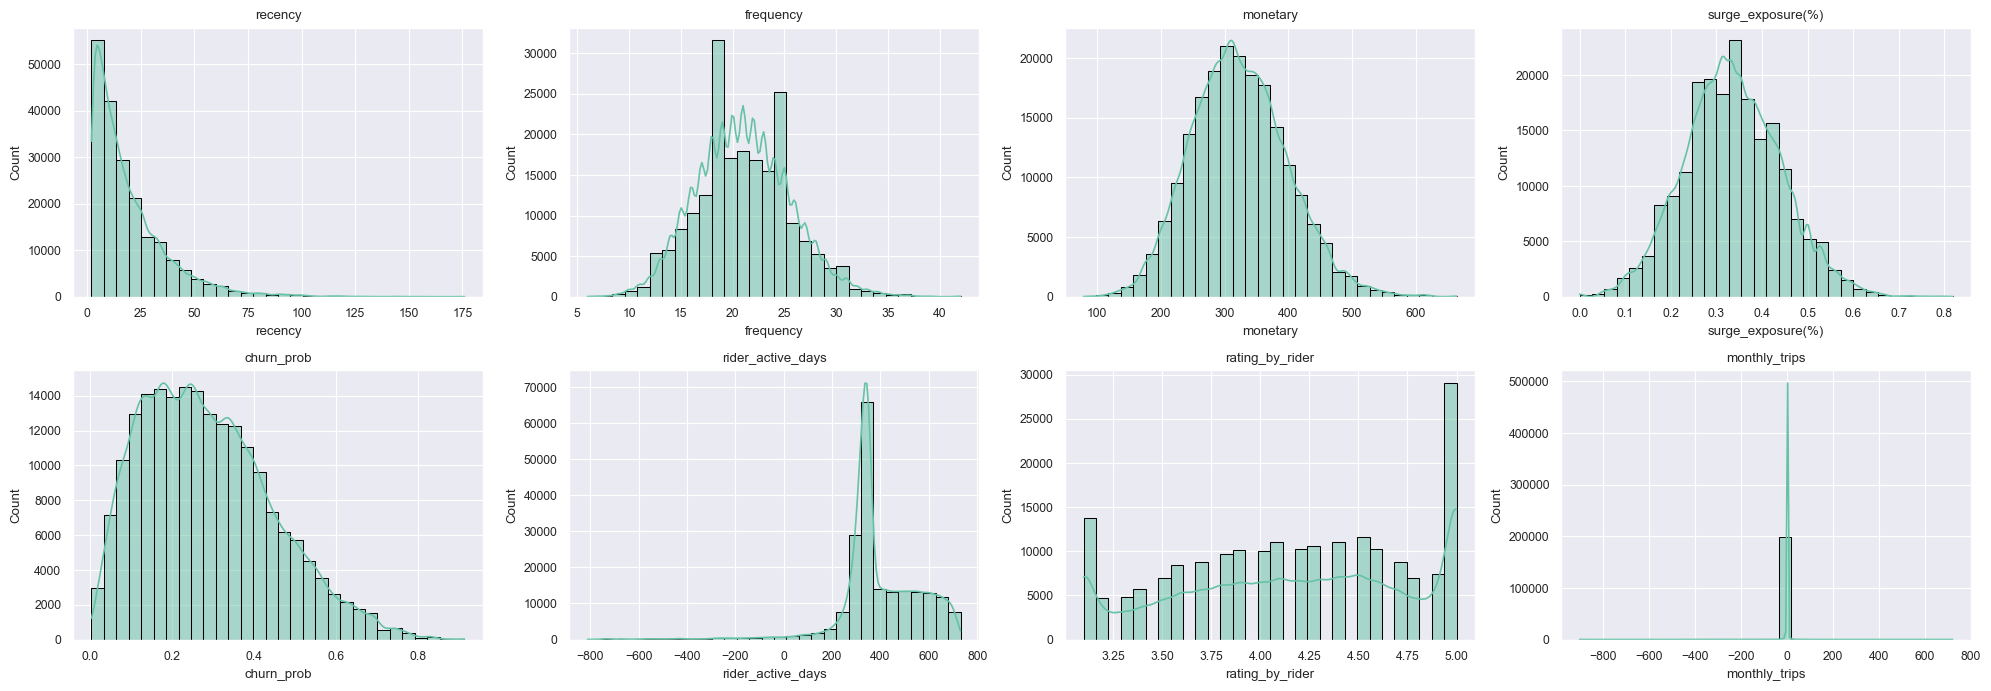

In [28]:
columns_to_scale = ['recency', 'frequency','monetary','surge_exposure(%)','churn_prob','rider_active_days','rating_by_rider','monthly_trips']
sns.set(style='darkgrid', palette='Set2', context='paper')
fig, ax = plt.subplots(2,4, figsize=(20,7))
ax = ax.flatten()
for idx, col in enumerate(columns_to_scale):
  sns.histplot(x=master_rfm_df[col], ax=ax[idx], bins=30, kde=True, edgecolor='black')
  ax[idx].set_title(col)
plt.tight_layout()
plt.show();


##### **Recency**
The recency distribution shows that most riders are highly recent, with activity concentrated below 25 days. This pattern is heavily skewed, indicating that short recency windows dominate the dataset. Only a small number of riders display long inactivity periods, suggesting limited long‑term gaps in engagement.  

##### **Frequency**
The frequency distribution shows that most riders fall between 18 and 25 trips, forming the dominant cluster in the dataset.

##### **Monetary**
The monetary distribution shows that rider spending is centred around £300, with values clustering tightly near this point, reflecting consistent spending behaviour. The spread narrows around this average, reinforcing the stability of rider expenditure. While some outliers exist at higher amounts, they are relatively uncommon and do not significantly affect the overall pattern.

##### **Surge Exposure (%)**
The surge exposure distribution shows that most riders experience values around 0.3, indicating a typical level of exposure. The pattern appears relatively balanced, without extreme skew, which suggests that surge pricing affects riders in a moderate and consistent way across the dataset.

##### **Churn Probability**
The churn probability distribution peaks between 0.2 and 0.3, indicating a moderate level of churn risk among riders. Only a small proportion fall into the very high churn probability ranges, which suggests that extreme risk cases are limited. Overall, the majority of riders are not at immediate risk of leaving, reflecting a relatively stable customer base.

##### **Rider Active Days**
The rider active days distribution shows a sharp peak near 400, indicating that a large proportion of riders remain consistently engaged over time. This pattern highlights strong long‑term activity across the dataset. Very few riders display low active days, reinforcing the evidence of sustained participation and long‑term loyalty.

##### **Rating by Rider**
The rider ratings distribution shows a strong clustering near 5, reflecting generally high satisfaction among riders. This pattern suggests that most users consistently provide positive feedback. Very few ratings fall at the lower end, indicating limited dissatisfaction within the dataset.

##### **Monthly Trips**
The monthly trips distribution shows a significant spike near zero, indicating that many riders record minimal activity on a monthly basis. This occurs despite some riders maintaining long active days overall, suggesting that engagement does not always translate into frequent trips.  


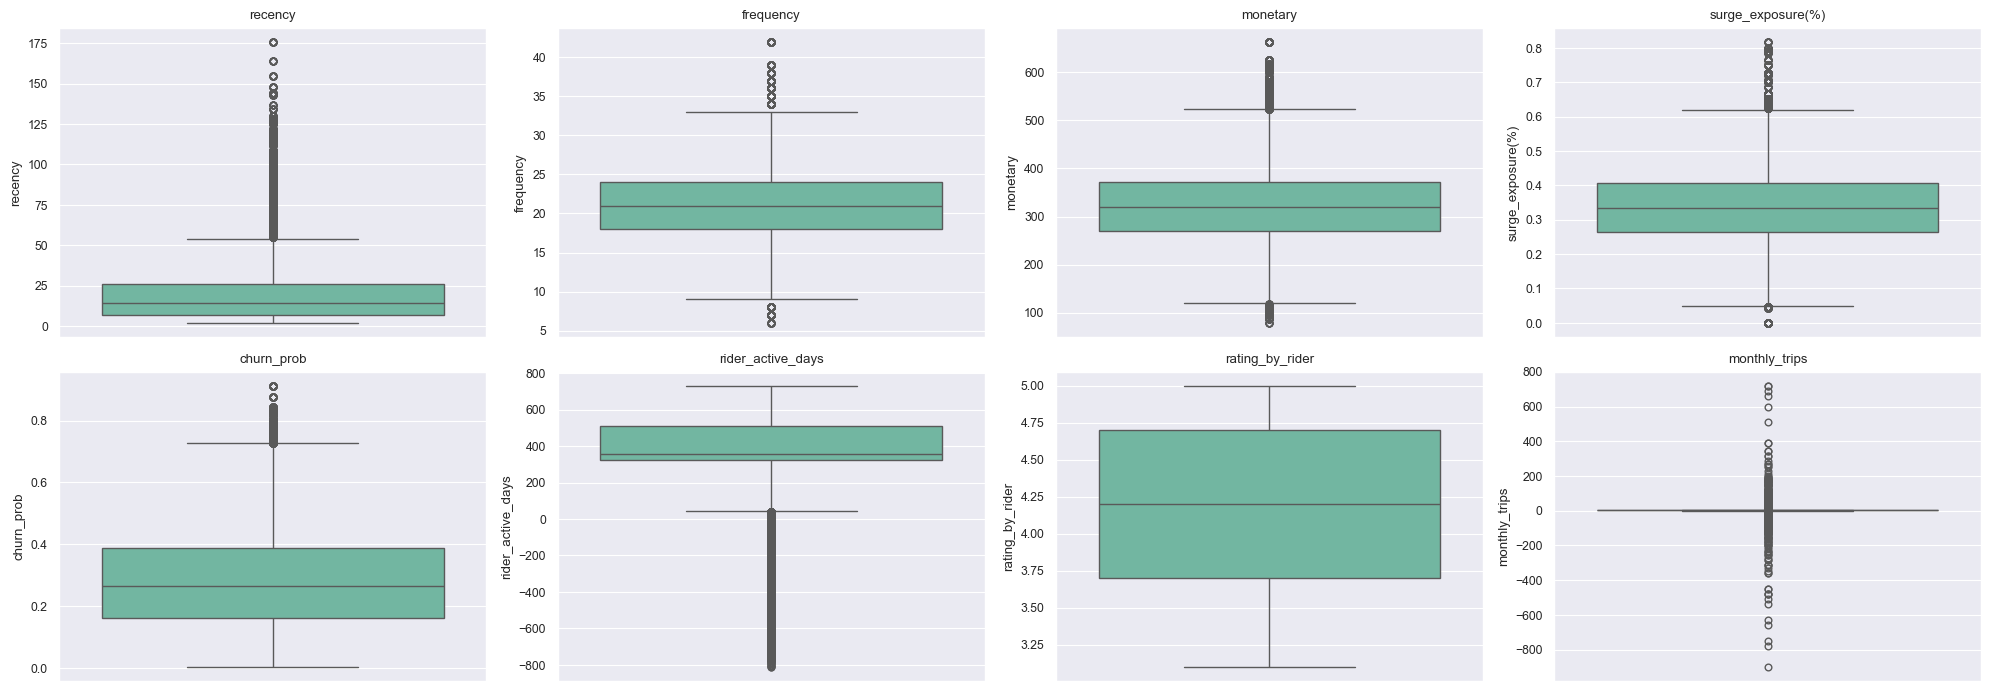

In [29]:
columns_to_scale = ['recency', 'frequency','monetary','surge_exposure(%)','churn_prob','rider_active_days','rating_by_rider','monthly_trips']
fig, ax = plt.subplots(2,4, figsize=(20,7))
ax = ax.flatten()
for idx, col in enumerate(columns_to_scale):
  sns.boxplot(y=master_rfm_df[col], ax=ax[idx])
  ax[idx].set_title(col)
plt.tight_layout()
plt.show();

####

### **Transforming the columns to reduce the effect of the outliers**

**Resolving the infinite and missing values in specific relevant columns**

In [30]:
import numpy as np

# Replace infinities with NaN
master_rfm_df[columns_to_scale] = master_rfm_df[columns_to_scale].replace([np.inf, -np.inf], np.nan)

# Fill NaN with a safe value (mean, median, or 0)
master_rfm_df[columns_to_scale] = master_rfm_df[columns_to_scale].fillna(0)

# Double-check everything is finite
print(np.isfinite(master_rfm_df[columns_to_scale]).all().all())  # should return True

True


In [31]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [32]:
master_rfm_df[columns_to_scale] = pt.fit_transform(master_rfm_df[columns_to_scale])

In [33]:
master_rfm_df.head(2)

,recency,frequency,monetary,surge_exposure(%),loyalty_status,churn_prob,rider_active_days,rating_by_rider,monthly_trips,is_churning
0,0.377677,-2.147748,-2.231874,-0.802963,1,0.866197,0.176523,-1.710122,-0.106381,1
1,-1.309826,0.036049,0.556137,1.311586,0,-0.485207,-1.025785,-1.710122,0.110240,0


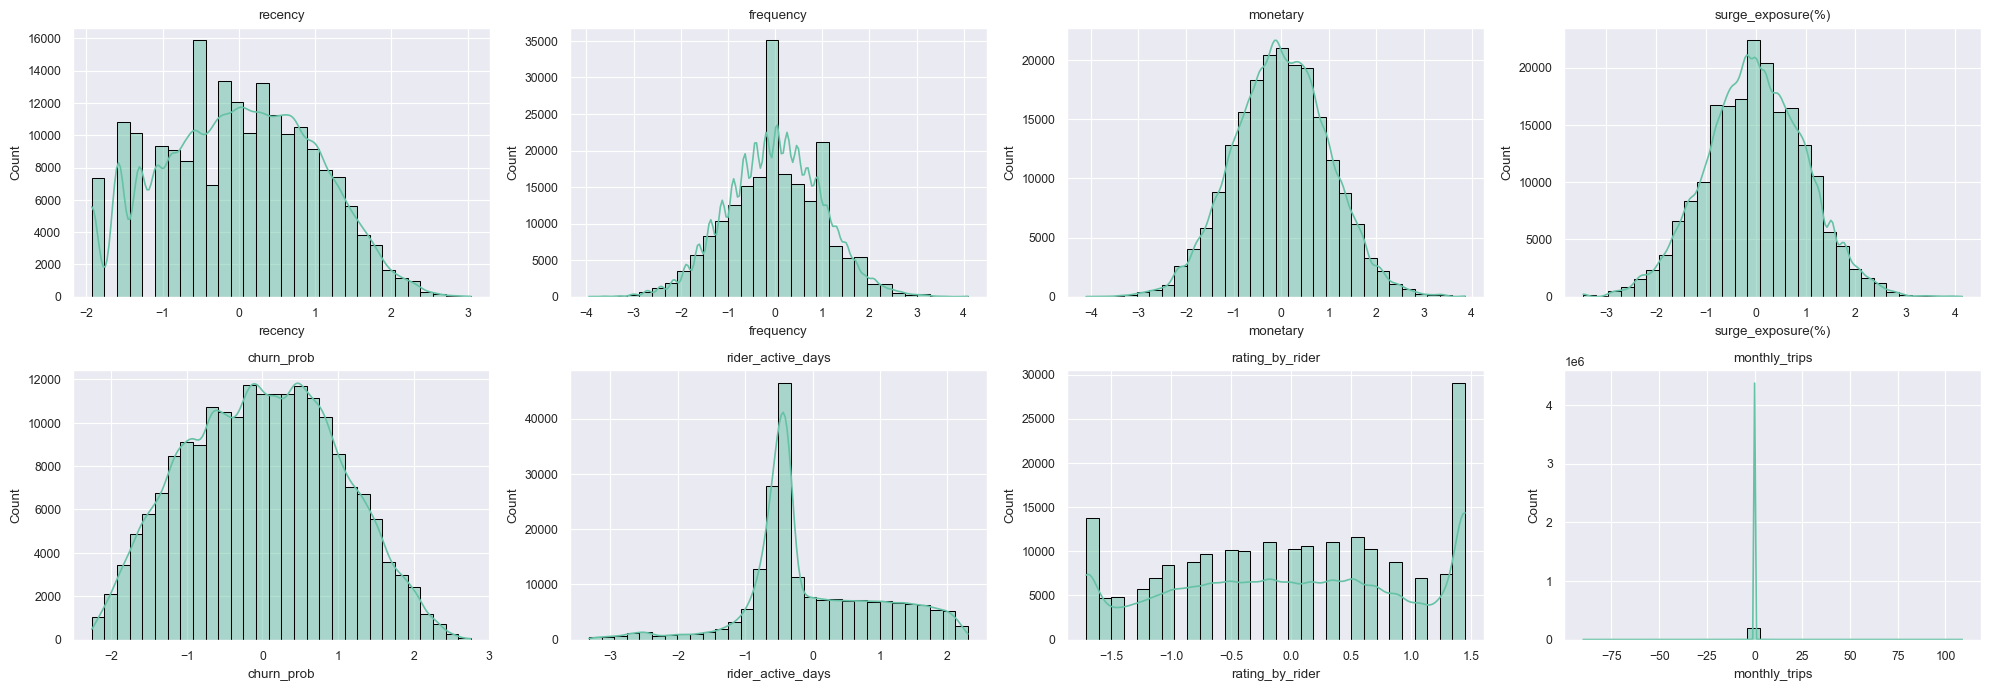

In [34]:
columns_to_scale = ['recency', 'frequency','monetary','surge_exposure(%)','churn_prob','rider_active_days','rating_by_rider','monthly_trips']
fig, ax = plt.subplots(2,4, figsize=(20,7))
ax = ax.flatten()
for idx, col in enumerate(columns_to_scale):
  sns.histplot(x=master_rfm_df[col], ax=ax[idx], bins=30, kde=True, edgecolor='black')
  ax[idx].set_title(col)
plt.tight_layout()
plt.show();

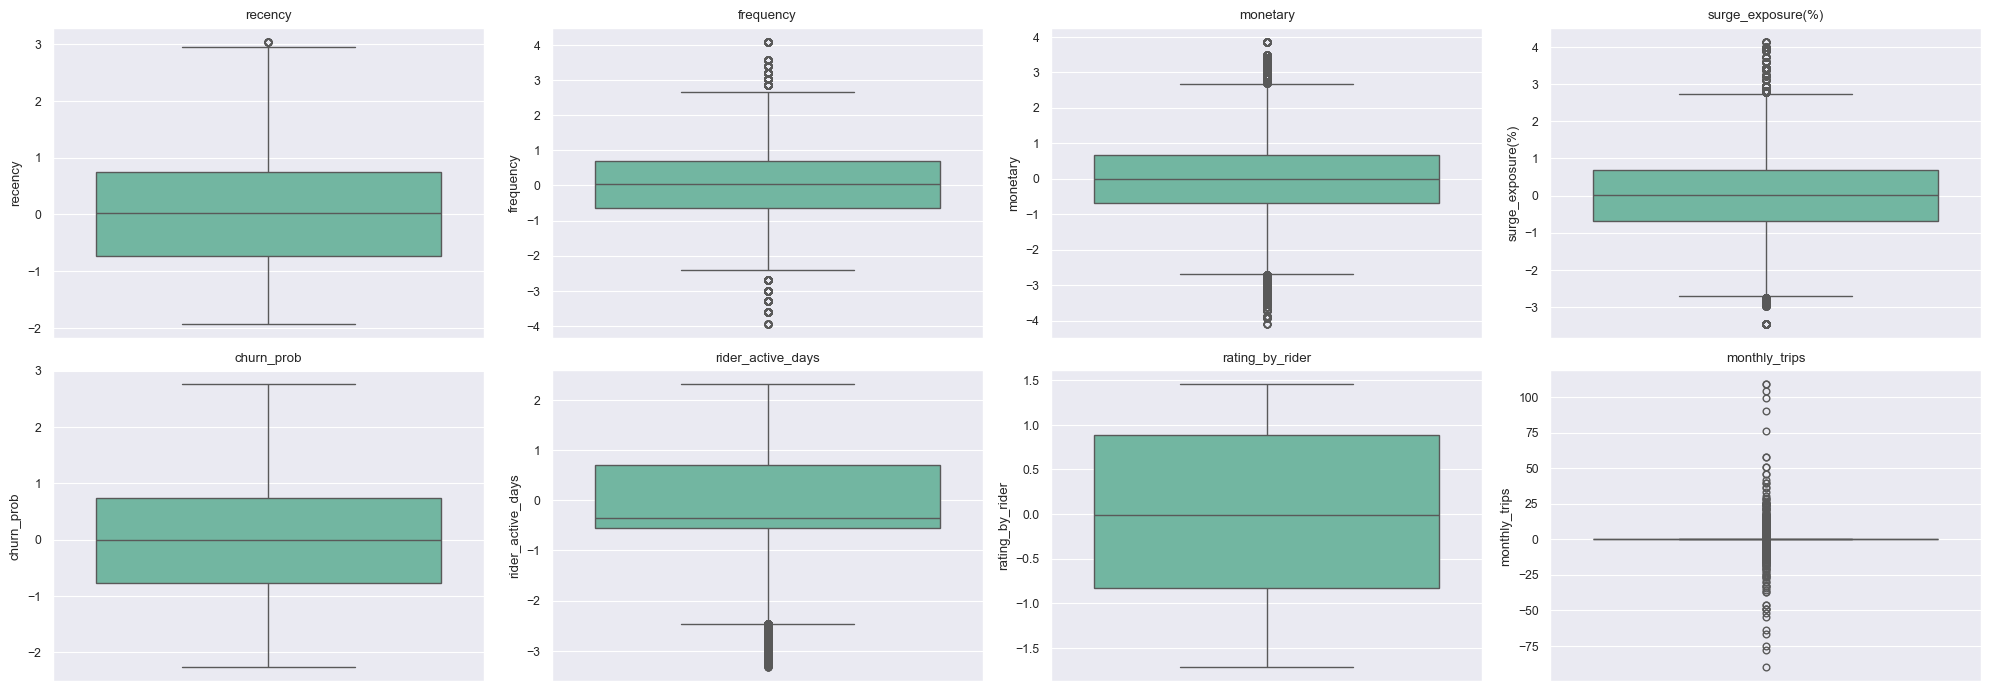

In [35]:
columns_to_scale = ['recency', 'frequency','monetary','surge_exposure(%)','churn_prob','rider_active_days','rating_by_rider','monthly_trips']
fig, ax = plt.subplots(2,4, figsize=(20,7))
ax = ax.flatten()
for idx, col in enumerate(columns_to_scale):
  sns.boxplot(y=master_rfm_df[col], ax=ax[idx])
  ax[idx].set_title(col)
plt.tight_layout()
plt.show();

#####

**Applying StandardScaler to the columns**

In [36]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [37]:
master_rfm_df[columns_to_scale] = ss.fit_transform(master_rfm_df[columns_to_scale])

In [38]:
master_rfm_df.head(2)

,recency,frequency,monetary,surge_exposure(%),loyalty_status,churn_prob,rider_active_days,rating_by_rider,monthly_trips,is_churning
0,0.377677,-2.147748,-2.231874,-0.802963,1,0.866197,0.176523,-1.710122,-0.106381,1
1,-1.309826,0.036049,0.556137,1.311586,0,-0.485207,-1.025785,-1.710122,0.110240,0


**Visualising the distribution of the `is_churning` target variable**

In [39]:
master_rfm_df['is_churning'].value_counts(normalize=True)*100

is_churning
0    89.5155
1    10.4845
Name: proportion, dtype: float64

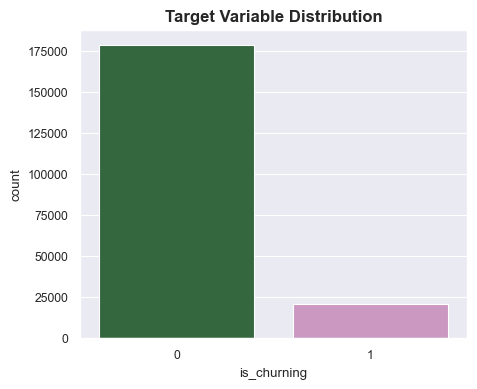

In [40]:
sns.set(style='darkgrid', palette='Set2', context='paper')
plt.figure(figsize=(5,4))
sns.countplot(x='is_churning', data=master_rfm_df, palette='cubehelix')
plt.title('Target Variable Distribution', weight='bold', fontsize='12')
plt.show();

In [41]:
master_rfm_df.to_csv('C:/Users/User/Desktop/ridewise/data/processed_data/masters_df.csv')    # saving the dataframe

#####

### **Spliting the Dataframe for model training**

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = master_rfm_df.drop(columns=['is_churning'])
y = master_rfm_df['is_churning']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
y_train.value_counts(normalize=True)*100    # checking the class imbalance of the target variable

is_churning
0    89.494375
1    10.505625
Name: proportion, dtype: float64

*The results show a clear class imbalance, with `Not Churning` representing more than 89% of cases and `Churning` accounting for around 11%.*

---

#### **Oversampling the training portion of the DataFrame for model development**

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [47]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [48]:
y_resampled.value_counts(normalize=True)*100

is_churning
0    50.0
1    50.0
Name: proportion, dtype: float64

#####

**Training a baseline model using Logistic Regression**

In [49]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=42)

In [50]:
lg_model = lg.fit(X_resampled, y_resampled)
y_pred = lg_model.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [51]:
y_test.head()

119737    0
72272     0
158154    0
65426     0
30074     0
Name: is_churning, dtype: int64

**Evaluating the trained baseline model**

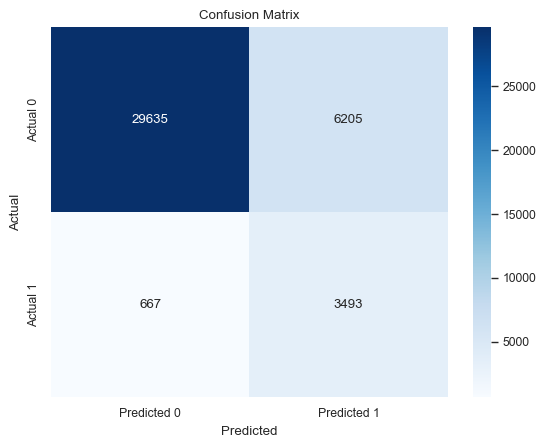

The confusion matrix of the model is: 
[[29635  6205]
 [  667  3493]]
The classification report of the model is: 
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     35840
           1       0.36      0.84      0.50      4160

    accuracy                           0.83     40000
   macro avg       0.67      0.83      0.70     40000
weighted avg       0.91      0.83      0.86     40000



In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot= True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();
print(f'The confusion matrix of the model is: \n{matrix}')
print(f'The classification report of the model is: \n{report}')

- The model performs strongly on the **Not Churning** class, with high precision (0.98) and a solid f1‑score (0.90), though recall is slightly lower at 0.83.

- For the **Churning** class, recall is relatively high at 0.84, but precision is low (0.36), leading to a modest f1‑score of 0.50.

Overall accuracy stands at 83%, with the weighted average f1‑score at 0.86, showing the model is reliable but struggles to balance performance across both classes.

---

#####

#### **Feature Importance:** *Sorting the importance of Features*

In [53]:
coefficients = pd.DataFrame({'Feature':X.columns,'Coefficient': lg_model.coef_.ravel()})
coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=False)
coefficients_sorted

,Feature,Coefficient
0,recency,0.828631
5,churn_prob,0.668481
6,rider_active_days,0.571339
4,loyalty_status,0.327103
3,surge_exposure(%),0.026147
2,monetary,0.010981
1,frequency,-0.564643
7,rating_by_rider,-1.377130
8,monthly_trips,-6.510250


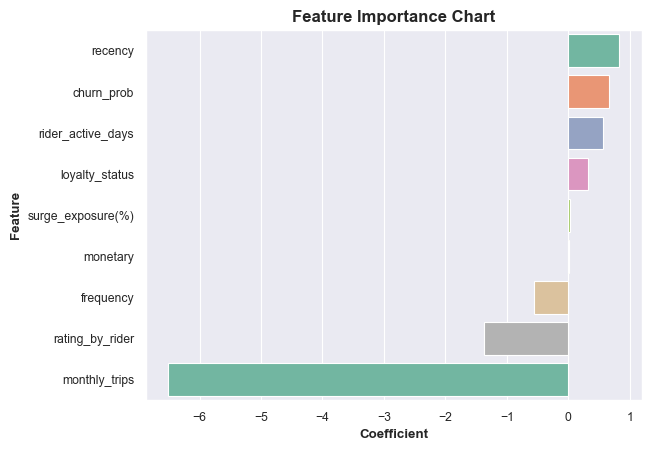

In [54]:
sns.barplot(x='Coefficient', y='Feature', data=coefficients_sorted, palette='Set2')
plt.title('Feature Importance Chart', weight='bold', fontsize='12')
plt.xlabel('Coefficient', weight='bold')
plt.ylabel('Feature', weight='bold')
plt.show();

#####

### **Advance Model Training:** Training advanced classification models including Decision Trees, Random Forest, SVM, KNN, Naive Bayes, XGBoost, and AdaBoost.

In [55]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [56]:
!pip install XGBoost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.2/101.7 MB 5.6 MB/s eta 0:00:19
   ---------------------------------------- 1.1/101.7 MB 14.6 MB/s eta 0:00:07
   - -------------------------------------- 2.7/101.7 MB 19.5 MB/s eta 0:00:06
   - -------------------------------------- 4.1/101.7 MB 21.8 MB/s eta 0:00:05
   -- ------------------------------------- 5.9/101.7 MB 25.3 MB/s eta 0:00:04
   --- ------------------------------------ 7.7/101.7 MB 27.5 MB/s eta 0:00:04
   --- ------------------------------------ 9.4/101.7 MB 28.7 MB/s eta 0:00:04
   ---- ----------------------------------- 11.3/101.7 MB 34.4 MB/s eta 0:00:03
   ----- ---------------------------------- 13.2/101.7 MB 36.3 MB/s eta 0:00:03
   ----- ---------------------------------- 14.8/101.7 MB 38.5 MB/s eta 0:00:03
   ------ --------------------------------- 16.8/101.7 MB 38.6 MB/s eta 0:00:03
   ------- -------------------------------- 18.7/101.7 MB

In [57]:
from xgboost import XGBClassifier

**Initializing the advanced classification models**

In [58]:
models = {
    'RF_Classifier': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'GB_Classifier': GradientBoostingClassifier(random_state=42),
    'AdaBoost_Classifier': AdaBoostClassifier(random_state=42),
    'Dt_Classifier': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    # 'SVM_Classifier': SVC(random_state=42, class_weight='balanced'),
    'KNN_Classifier': KNeighborsClassifier(),
    'NB_Classifier': GaussianNB()
    }

**Training and Evaluating the advanced models**

 

Training the RF_Classifier model
The accuracy of the RF_Classifier model is: 0.999975
The confusion matrix of the RF_Classifier model is: 
[[35839     1]
 [    0  4160]]
The classification report of the RF_Classifier model is: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35840
           1       1.00      1.00      1.00      4160

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



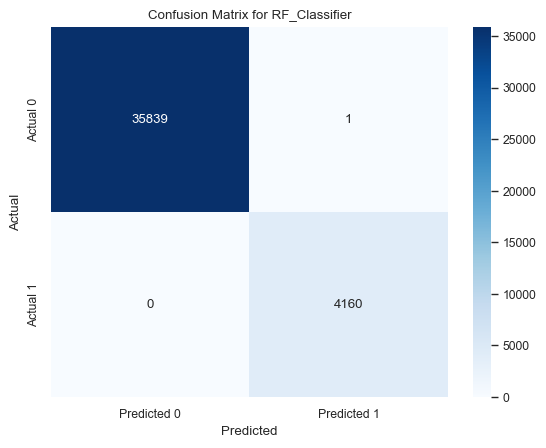

 

Training the GB_Classifier model
The accuracy of the GB_Classifier model is: 0.999875
The confusion matrix of the GB_Classifier model is: 
[[35835     5]
 [    0  4160]]
The classification report of the GB_Classifier model is: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35840
           1       1.00      1.00      1.00      4160

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



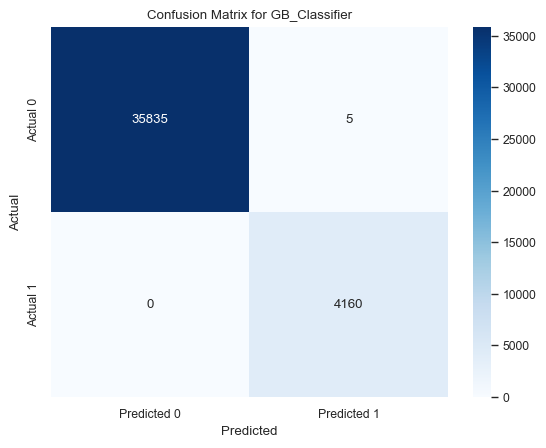

 

Training the AdaBoost_Classifier model
The accuracy of the AdaBoost_Classifier model is: 0.917
The confusion matrix of the AdaBoost_Classifier model is: 
[[32716  3124]
 [  196  3964]]
The classification report of the AdaBoost_Classifier model is: 
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     35840
           1       0.56      0.95      0.70      4160

    accuracy                           0.92     40000
   macro avg       0.78      0.93      0.83     40000
weighted avg       0.95      0.92      0.93     40000



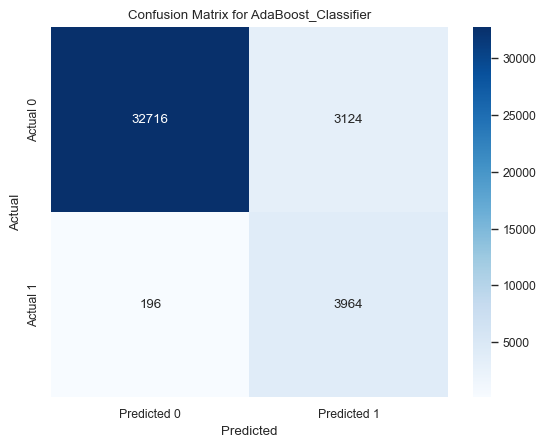

 

Training the Dt_Classifier model
The accuracy of the Dt_Classifier model is: 0.99995
The confusion matrix of the Dt_Classifier model is: 
[[35838     2]
 [    0  4160]]
The classification report of the Dt_Classifier model is: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35840
           1       1.00      1.00      1.00      4160

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



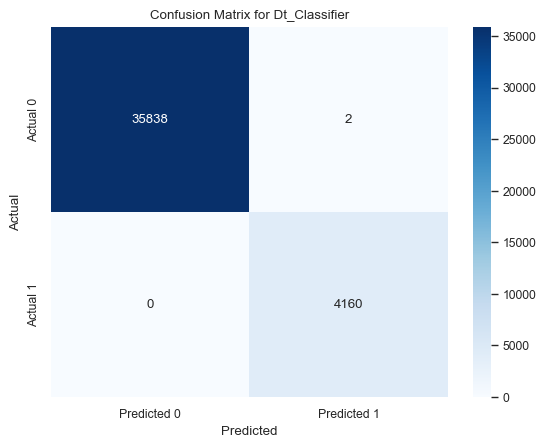

 

Training the KNN_Classifier model
The accuracy of the KNN_Classifier model is: 0.972875
The confusion matrix of the KNN_Classifier model is: 
[[34848   992]
 [   93  4067]]
The classification report of the KNN_Classifier model is: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     35840
           1       0.80      0.98      0.88      4160

    accuracy                           0.97     40000
   macro avg       0.90      0.97      0.93     40000
weighted avg       0.98      0.97      0.97     40000



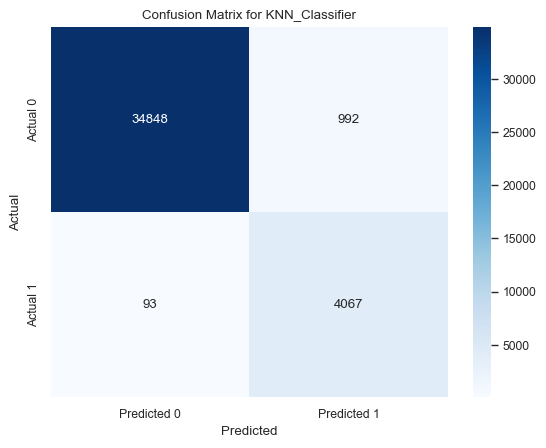

 

Training the NB_Classifier model
The accuracy of the NB_Classifier model is: 0.884
The confusion matrix of the NB_Classifier model is: 
[[32410  3430]
 [ 1210  2950]]
The classification report of the NB_Classifier model is: 
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     35840
           1       0.46      0.71      0.56      4160

    accuracy                           0.88     40000
   macro avg       0.71      0.81      0.75     40000
weighted avg       0.91      0.88      0.89     40000



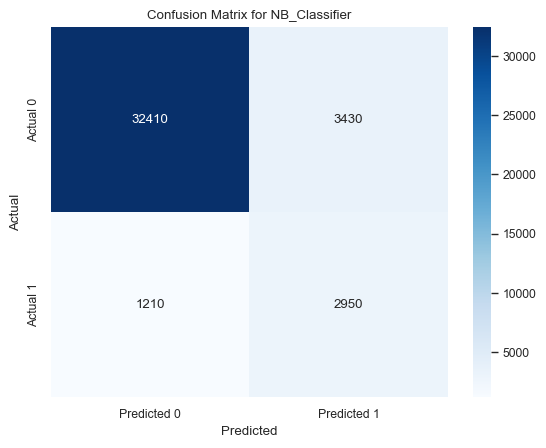

In [59]:
for model_name, model in models.items():
  print(' \n')
  print(f'Training the {model_name} model')
  model.fit(X_resampled, y_resampled)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f'The accuracy of the {model_name} model is: {accuracy}')
  report = classification_report(y_test, y_pred)
  matrix = confusion_matrix(y_test, y_pred)
  sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
  plt.title(f'Confusion Matrix for {model_name}')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  print(f'The confusion matrix of the {model_name} model is: \n{matrix}')
  print(f'The classification report of the {model_name} model is: \n{report}')
  plt.show();

#

**Applying hyperparameter tuning to the Random Forest model**

In [60]:
from sklearn.model_selection import GridSearchCV

Fitting 3 folds for each of 20 candidates, totalling 60 fits
✅ Best parameters found: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Accuracy: 0.999975
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     35840
           1       1.00      1.00      1.00      4160

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



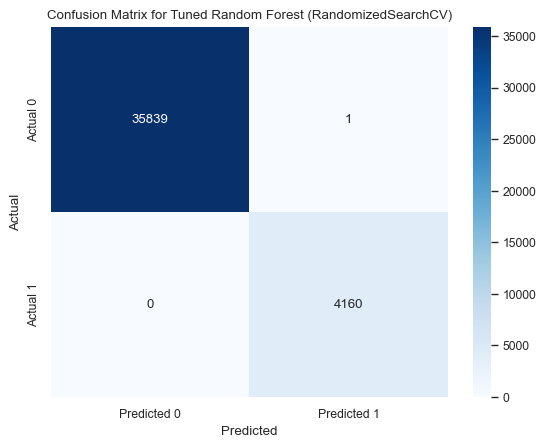

In [61]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestClassifier(random_state=42, class_weight="balanced")     # Define the Random Forest model

# Setting up hyperparameter grid (same as before)
param_grid = {
    "n_estimators": [100, 200, 300],       # number of trees
    "max_depth": [None, 10, 20],           # depth of trees
    "min_samples_split": [2, 5, 10],       # minimum samples to split a node
    "min_samples_leaf": [1, 2, 4]          # minimum samples at a leaf
}

# Applying RandomizedSearchCV for faster hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=20,             # number of random combinations to try
    cv=3,                  # 3-fold cross validation
    n_jobs=-1,             # use all CPU cores
    verbose=2,
    random_state=42
)

random_search.fit(X_resampled, y_resampled)

# Getting the best model
best_rf = random_search.best_estimator_
print("✅ Best parameters found:", random_search.best_params_)

# Evaluating the tuned model
y_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix for Tuned Random Forest (RandomizedSearchCV)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show();


**Computing and plotting the Random Forest Classifier feature importance**

In [62]:
importances = best_rf.feature_importances_      # Getting feature importances from Random Forest

# Putting them into a DataFrame
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importances_sorted = feature_importances.sort_values(
    by='Importance', ascending=False
)

feature_importances_sorted


,Feature,Importance
8,monthly_trips,0.323037
7,rating_by_rider,0.193131
0,recency,0.181454
5,churn_prob,0.142078
6,rider_active_days,0.068929
4,loyalty_status,0.053479
1,frequency,0.023232
2,monetary,0.012692
3,surge_exposure(%),0.001968


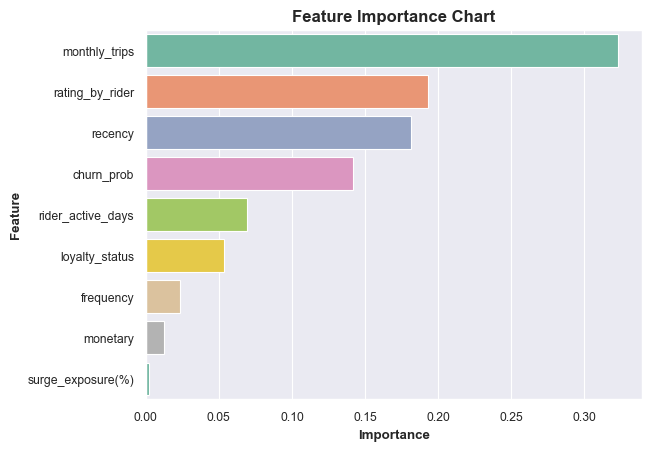

In [63]:
sns.barplot(x='Importance', y='Feature', data=feature_importances_sorted, palette='Set2')
plt.title('Feature Importance Chart', weight='bold', fontsize='12')
plt.xlabel('Importance', weight='bold')
plt.ylabel('Feature', weight='bold')
plt.show();

Monthly trips, rider ratings, and recency are the strongest drivers of predictions, showing that ride activity and customer feedback heavily influence the model.

Surge exposure, monetary, and frequency contribute very little, meaning they play only a minor role in shaping outcomes compared to engagement and loyalty indicators.

---

#####

**ROC Curve and AUC Score***

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score
y_probability = best_rf.predict_proba(X_test)[:,1]

In [65]:
fpr, tpr, tresholds = roc_curve(y_test, y_probability)
auc_score = roc_auc_score(y_test, y_probability)

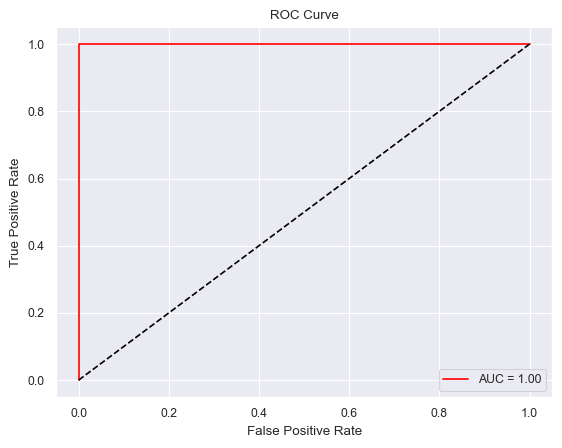

In [66]:
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='red')
plt.plot([0,1],[0,1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show();

**Saving the selected model for real‑world application**

In [67]:
import pickle

with open("C:/Users/User/Desktop/ridewise/model/random_forest_model.pkl", "wb") as f:    # Saving the best trained model as a pickle file
    pickle.dump(best_rf, f)
print("Model saved successfully as 'random_forest_model.pkl'")
with open("C:/Users/User/Desktop/ridewise/model/random_forest_model.pkl", "rb") as f:  # Load the model back for deployment or prediction
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)     # Use the loaded model to make sample predictions
print("Model loaded successfully and ready for predictions")
print("Sample predictions:", y_pred[:10])


Model saved successfully as 'random_forest_model.pkl'
Model loaded successfully and ready for predictions
Sample predictions: [0 0 0 0 0 0 0 0 0 0]


## **Implementing SHAP on the best trained model (Random Forest Classifier)**

*Using SHAP values to explain how each feature contributes to the model’s predictions, providing transparency into why the classifier decides whether a rider is likely to churn or not.*

In [ ]:
import shap

explainer = shap.TreeExplainer(best_rf)           # Creating a SHAP explainer for the tuned Random Forest
shap_values = explainer.shap_values(X_test)       # Calculating SHAP values for the test set
shap.summary_plot(shap_values, X_test, plot_type="bar")   # Visualising feature importance (global explanation)
shap.summary_plot(shap_values, X_test)            # Detailing summary plot (shows distribution of impact per feature)
# Explaining a single prediction (local explanation)
# Pick one test sample, e.g. the first row
plt.figure(figsize=(40, 15)) # width=15, height=5 (adjust as needed)
sample_index = 0
shap.force_plot(
    explainer.expected_value[1],
    shap_values[sample_index, :, 1],
    X_test.iloc[sample_index,:],
    matplotlib=True
)
